# Time Series Decomposition Assignment

## Whitney Ball
First I am importing the relevant packages and taking an initial look at my data in the form of a table and a graph.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


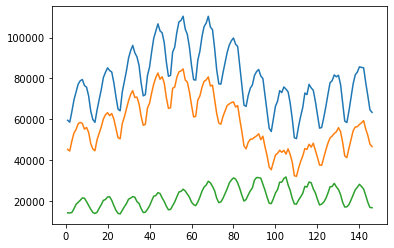

In [3]:
plt.plot(df['Month'],df['Total Construction'])
plt.plot(df['Month'],df['Private Construction'])
plt.plot(df['Month'],df['Public Construction'])

### Time-Series Conversion
Below, I will convert the date data to a date-time index so the following analyses will work properly.

In [4]:
date_data = {'Jan' : ('01', '31'), 'Feb' : ('02', '28'), 'Mar' : ('03', '31'), 'Apr' : ('04', '30'), 'May' : ('05', '31'), 'Jun' : ('06', '30'), 'Jul' : ('07', '31'), 'Aug' : ('08', '31'), 'Sep' : ('09', '30'), 'Oct' : ('10', '31'), 'Nov' : ('11', '30'), 'Dec' : ('12', '31')}

def to_data_range(date_str):
    return '20' + date_str[-2:] + '-' + date_data[date_str[:3]][0] + '-' + date_data[date_str[:3]][1]

df['YearMonthDay'] = df['Month-Year'].apply(to_data_range)
df['YearMonthDay'].head()

0    2002-01-31
1    2002-02-28
2    2002-03-31
3    2002-04-30
4    2002-05-31
Name: YearMonthDay, dtype: object

In [5]:
pd.date_range(start=df['YearMonthDay'].iloc[0], end=df['YearMonthDay'].iloc[df.shape[0] - 1], freq='M')

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28'],
              dtype='datetime64[ns]', length=146, freq='M')

In [6]:
df.index = pd.date_range(start=df['YearMonthDay'].iloc[0], end=df['YearMonthDay'].iloc[df.shape[0] - 1], freq='M')
df.index

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28'],
              dtype='datetime64[ns]', length=146, freq='M')

## Public Spending Time Series Decomposition
---

### Beginning the Time Series Decomposition
Now that the data is in the correct format I will work on calculating the squared error and moving average for Spending on Public Construction. Based on the graph above I will be using the non-linear approach for Spending on Public Construction. I used a window value of 36 because that proved to be most appropriate for this data.

Average Squared Error per Month:  13581548.10100133
            Month Month-Year  Total Construction  Private Construction  \
2003-07-31     19     Jul-03               82971                 62216   
2003-08-31     20     Aug-03               85191                 63234   
2003-09-30     21     Sep-03               83841                 61767   
2003-10-31     22     Oct-03               83133                 62813   
2003-11-30     23     Nov-03               77915                 60115   
...           ...        ...                 ...                   ...   
2012-04-30    124     Apr-12               66223                 44964   
2012-05-31    125     May-12               72240                 48342   
2012-06-30    126     Jun-12               77876                 50900   
2012-07-31    127     Jul-12               78897                 51794   
2012-08-31    128     Aug-12               81712                 53073   

            Public Construction YearMonthDay     MovAvgPub 

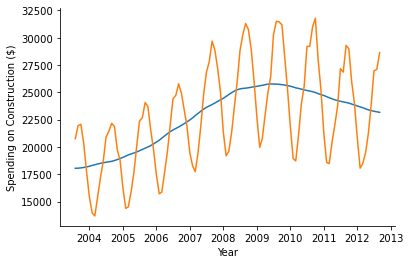

In [7]:
def sqErr(row):
    return (row['Public Construction'] - row['MovAvgPub'])**2

#creating the additional rows
df['MovAvgPub'] = np.NaN
df['sqErrPub'] = np.NaN

window = 36
window = window - window % 2

for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvgPub'] = (0.5*df.iloc[i - int(window/2)]['Public Construction'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df.iloc[i + int(window/2)]['Public Construction'])/float(window)

df['sqErrPub'] = (df['Public Construction'] - df['MovAvgPub'])**2
df['sqErrPub'] = df.apply(sqErr,axis='columns')

df.dropna(how='any',inplace=True)

#figure
fig,ax = plt.subplots()
ax.plot(df['MovAvgPub'],label='Moving Avg. Public')
ax.plot(df['Public Construction'],label='Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df['sqErrPub'])/len(df))
print(df)

In [8]:
df['R1Public'] = df['Public Construction'] - df['MovAvgPub']
df['R1PublicError'] = abs((df['Public Construction'] - df['R1Public'])/df['Public Construction'])
df.style.format({
    'MovAvgPub': '{:.1f}'.format,
    'sqErrPub': '{:,.1f}'.format,
    'R1Public': '{:,.1f}'.format,
    'R1PublicError': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,YearMonthDay,MovAvgPub,sqErrPub,R1Public,R1PublicError
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,2003-07-31,18050.5,"7,314,395.4","2,704.5",0.870
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,2003-08-31,18058.0,"15,202,201.0","3,899.0",0.822
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,2003-09-30,18084.9,"15,920,765.0","3,990.1",0.819
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,2003-10-31,18126.2,"4,817,354.3","2,194.8",0.892
2003-11-30 00:00:00,23,Nov-03,77915,60115,17801,2003-11-30,18170.0,"136,161.0",-369.0,1.021
2003-12-31 00:00:00,24,Dec-03,71050,55584,15466,2003-12-31,18235.5,"7,670,130.2","-2,769.5",1.179
2004-01-31 00:00:00,25,Jan-04,64934,50975,13959,2004-01-31,18309.2,"18,923,950.0","-4,350.2",1.312
2004-02-29 00:00:00,26,Feb-04,64138,50449,13689,2004-02-28,18377.0,"21,976,953.3","-4,688.0",1.342
2004-03-31 00:00:00,27,Mar-04,73238,57796,15443,2004-03-31,18444.6,"9,009,669.3","-3,001.6",1.194
2004-04-30 00:00:00,28,Apr-04,78354,61177,17177,2004-04-30,18502.0,"1,755,625.0","-1,325.0",1.077


Average Residual Public:  120.58522727272724


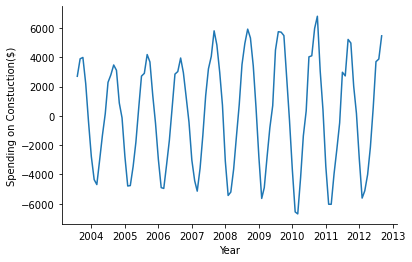

In [9]:
fig,ax = plt.subplots()
ax.plot(df['R1Public'])
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Constuction($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual Public: ', sum(df['R1Public'])/len(df))

In [10]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R1Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation Public = ',maxCorr)

Correlation, lag  1     0.8486375316894602
Correlation, lag  2     0.4846195337567183
Correlation, lag  3     -0.007177248780703143
Correlation, lag  4     -0.49554892375973447
Correlation, lag  5     -0.8288179569669593
Correlation, lag  6     -0.9462777407123573
Correlation, lag  7     -0.8288579638039721
Correlation, lag  8     -0.48571061970010343
Correlation, lag  9     0.004997098591155971
Correlation, lag  10     0.4817646196968951
Correlation, lag  11     0.8389178942275625
Correlation, lag  12     0.9802446550357118
Correlation, lag  13     0.8361843883266434
Correlation, lag  14     0.4848265284305894
Correlation, lag  15     -0.003592213269114516
Correlation, lag  16     -0.48222336701850393
Correlation, lag  17     -0.8171150144686051
Correlation, lag  18     -0.9427534781166457
Correlation, lag  19     -0.8337051906400711
Correlation, lag  20     -0.4961430024835644
Correlation, lag  21     -0.009858447978117565
Correlation, lag  22     0.4684416329134112
Correlation, lag 

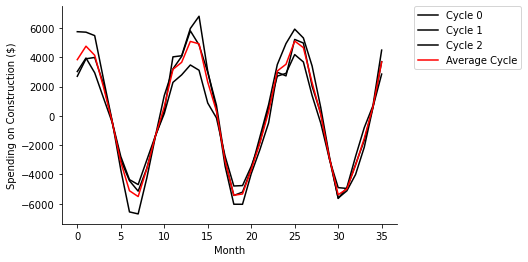

In [11]:
period = 36
cycleLen = period
numCycles = int(len(df)/cycleLen + 0.5)
cycles = [df.iloc[range(i*period,min((i+1)*period,len(df)))]['R1Public'] for i in range(numCycles)]
ptsInCycles = [df.iloc[range(i,len(df['R1Public']),period)]['R1Public'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

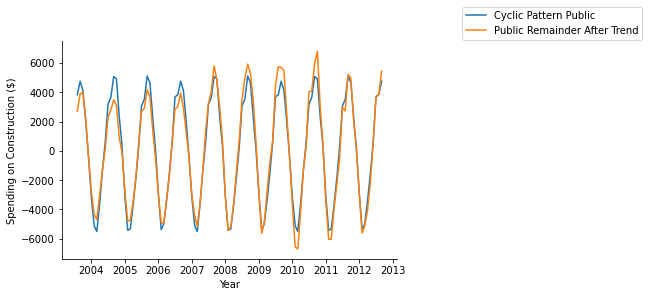

In [12]:
cycleLen = period  
numCycles = int(len(df)/cycleLen + 0.5)
df['C'] = np.NaN  
for i in range(len(df)):
    df.loc[df.index[i], 'C'] = avg[i % cycleLen]

fig,ax = plt.subplots()
ax.plot(df['C'],label='Cyclic Pattern Public')
ax.plot(df['R1Public'],label='Public Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Creating the R2 and R2Error Columns for Public Spending
Below, I create three new columns for SPending on Public Construction. The cyclical component (C), the error as a percentage of the Public Spending time series (R2Public), and the average absolute error of the original Public Spending time series (R2PublicError).

Average Error:  0.023224970271695
            Month Month-Year  Total Construction  Private Construction  \
2003-07-31     19     Jul-03               82971                 62216   
2003-08-31     20     Aug-03               85191                 63234   
2003-09-30     21     Sep-03               83841                 61767   
2003-10-31     22     Oct-03               83133                 62813   
2003-11-30     23     Nov-03               77915                 60115   
...           ...        ...                 ...                   ...   
2012-04-30    124     Apr-12               66223                 44964   
2012-05-31    125     May-12               72240                 48342   
2012-06-30    126     Jun-12               77876                 50900   
2012-07-31    127     Jul-12               78897                 51794   
2012-08-31    128     Aug-12               81712                 53073   

            Public Construction YearMonthDay     MovAvgPub     R1Public  \
20

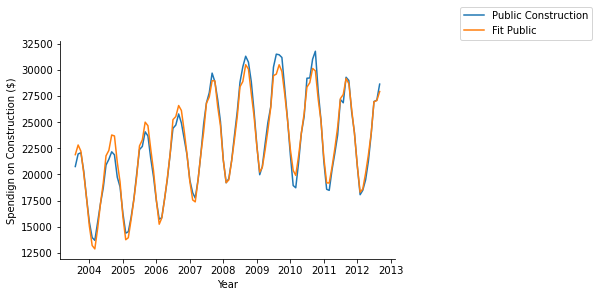

In [13]:
df['R2Public'] = df['R1Public'] - df['C']
df['R2PublicError'] = abs(df['R2Public']/df['Public Construction'])
df['fit public'] = df['MovAvgPub'] + df['C']
df.drop(['sqErrPub'],axis=1,inplace=True)
print('Average Error: ', sum(df['R2PublicError'])/len(df))
print(df)
fig,ax = plt.subplots()
ax.plot(df['Public Construction'],label='Public Construction')
ax.plot(df['fit public'], label = 'Fit Public')
ax.set_xlabel('Year')
ax.set_ylabel('Spendign on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Correlation, lag  1     0.7297837523638323
Correlation, lag  2     0.48528257816223996
Correlation, lag  3     0.25416895416047003
Correlation, lag  4     -0.056354886972488964
Correlation, lag  5     -0.2223369681213647
Correlation, lag  6     -0.322907388615984
Correlation, lag  7     -0.35840064006212274
Correlation, lag  8     -0.2183363504190699
Correlation, lag  9     0.04513200073134986
Correlation, lag  10     0.18561606964480742
Correlation, lag  11     0.4421789677665905
Correlation, lag  12     0.5737456465401485
Correlation, lag  13     0.45816619798833297
Correlation, lag  14     0.4499160484527294
Correlation, lag  15     0.21906468641111054
Correlation, lag  16     -0.008986356343827521
Correlation, lag  17     -0.12594745867986212
Correlation, lag  18     -0.24284285341100145
Correlation, lag  19     -0.29389097528719776
Correlation, lag  20     -0.19675336862764417
Correlation, lag  21     -0.09797992140346468
Correlation, lag  22     -0.004864513328407532
Correlation,

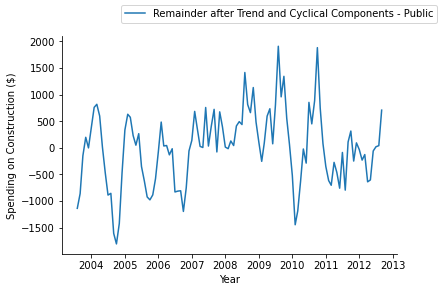

In [14]:
fig,ax = plt.subplots()
ax.plot(df['R2Public'],label='Remainder after Trend and Cyclical Components - Public')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R2Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

### Graphing the Model vs. the Original Data
Below is a graph depicting the model vs. the original data and the remainder.

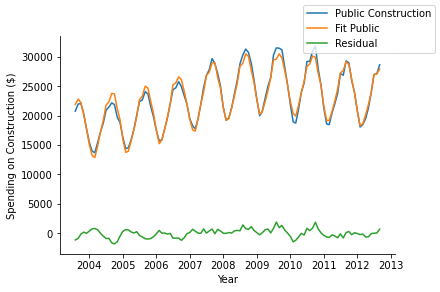

In [15]:
fig,ax = plt.subplots()
ax.plot(df['Public Construction'],label='Public Construction')
ax.plot(df['fit public'],label='Fit Public')
ax.plot(df['R2Public'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

## Private Spending Time Series Decomposition
---

### Beginning the Time Series Decomposition
Next I will work on calculating the squared error and moving average for Spending on Private Construction. Similar to above, I will use the non-linear approach. I used a window value of 36 because that proved to be most appropriate for this data.

Average Squared Error per Month:  43186090.054428615
            Month Month-Year  Total Construction  Private Construction  \
2006-07-31     55     Jul-06              108423                 83700   
2006-08-31     56     Aug-06              110434                 84649   
2006-09-30     57     Sep-06              104191                 79268   
2006-10-31     58     Oct-06              101582                 78199   
2006-11-30     59     Nov-06               95339                 73461   
2006-12-31     60     Dec-06               86436                 66972   
2007-01-31     61     Jan-07               79406                 61161   
2007-02-28     62     Feb-07               79177                 61437   
2007-03-31     63     Mar-07               88905                 69403   
2007-04-30     64     Apr-07               93375                 71433   
2007-05-31     65     May-07              100534                 75685   
2007-06-30     66     Jun-07              105399           

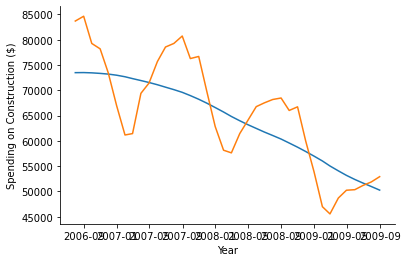

In [25]:
def sqErr(row):
    return (row['Private Construction'] - row['MovAvgPri'])**2

#creating the additional rows
df['MovAvgPri'] = np.NaN
df['sqErrPri'] = np.NaN

window = 36
window = window - window % 2

for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvgPri'] = (0.5*df.iloc[i - int(window/2)]['Private Construction'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df.iloc[i + int(window/2)]['Private Construction'])/float(window)

df['sqErrPri'] = (df['Private Construction'] - df['MovAvgPri'])**2
df['sqErrPri'] = df.apply(sqErr,axis='columns')

df.dropna(how='any',inplace=True)

#figure
fig,ax = plt.subplots()
ax.plot(df['MovAvgPri'],label='Moving Avg. Private')
ax.plot(df['Private Construction'],label='Private Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df['sqErrPri'])/len(df))
print(df)

In [17]:
df['R1Private'] = df['Private Construction'] - df['MovAvgPri']
df['R1PrivateError'] = abs((df['Private Construction'] - df['R1Private'])/df['Private Construction'])
df.style.format({
    'MovAvgPri': '{:.1f}'.format,
    'sqErrPri': '{:,.1f}'.format,
    'R1Private': '{:,.1f}'.format,
    'R1PrivateError': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,YearMonthDay,MovAvgPub,R1Public,R1PublicError,C,R2Public,R2PublicError,fit public,MovAvgPri,sqErrPri,R1Private,R1PrivateError
2005-01-31 00:00:00,37,Jan-05,71474,57094,14380,2005-01-31,19164.805556,-4784.805556,1.332740,-5415.513889,630.708333,0.043860,13749.291667,68422.6,"128,336,171.0","-11,328.6",1.198
2005-02-28 00:00:00,38,Feb-05,72048,57531,14517,2005-02-28,19273.083333,-4756.083333,1.327622,-5330.180556,574.097222,0.039547,13942.902778,69018.4,"131,959,784.4","-11,487.4",1.200
2005-03-31 00:00:00,39,Mar-05,81345,65425,15920,2005-03-31,19365.805556,-3445.805556,1.216445,-3675.967593,230.162037,0.014457,15689.837963,69558.9,"17,088,922.5","-4,133.9",1.063
2005-04-30 00:00:00,40,Apr-05,85485,67829,17656,2005-04-30,19447.902778,-1791.902778,1.101490,-1841.736111,49.833333,0.002822,17606.166667,70015.6,"4,781,389.6","-2,186.6",1.032
2005-05-31 00:00:00,41,May-05,92959,72862,20097,2005-05-31,19547.069444,549.930556,0.972636,283.921296,266.009259,0.013236,19830.990741,70414.7,"5,989,304.5","2,447.3",0.966
2005-06-30 00:00:00,42,Jun-05,99632,77258,22375,2005-06-30,19659.222222,2715.777778,0.878624,3066.305556,-350.527778,0.015666,22725.527778,70758.2,"42,247,111.2","6,499.8",0.916
2005-07-31 00:00:00,43,Jul-05,103158,80480,22679,2005-07-31,19774.277778,2904.722222,0.871920,3525.356481,-620.634259,0.027366,23299.634259,71057.9,"88,776,701.2","9,422.1",0.883
2005-08-31 00:00:00,44,Aug-05,106706,82629,24078,2005-08-31,19890.069444,4187.930556,0.826068,5110.481481,-922.550926,0.038315,25000.550926,71351.9,"127,171,982.0","11,277.1",0.864
2005-09-30 00:00:00,45,Sep-05,103269,79584,23685,2005-09-30,20002.722222,3682.277778,0.844531,4659.333333,-977.055556,0.041252,24662.055556,71665.8,"62,698,463.1","7,918.2",0.901
2005-10-31 00:00:00,46,Oct-05,102339,80820,21519,2005-10-31,20125.291667,1393.708333,0.935234,2277.861111,-884.152778,0.041087,22403.152778,71969.4,"78,332,825.3","8,850.6",0.890


Average Residual:  171.0810810810809


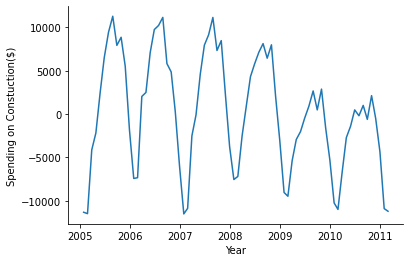

In [18]:
fig,ax = plt.subplots()
ax.plot(df['R1Private'])
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Constuction($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df['R1Private'])/len(df))

In [19]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R1Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8307863097435036
Correlation, lag  2     0.48911085964419543
Correlation, lag  3     0.08303772234439181
Correlation, lag  4     -0.26303346253816845
Correlation, lag  5     -0.49133250880953305
Correlation, lag  6     -0.6108668006784078
Correlation, lag  7     -0.520045859094501
Correlation, lag  8     -0.31148461559666185
Correlation, lag  9     0.011245399176011873
Correlation, lag  10     0.40888366129064657
Correlation, lag  11     0.7441470858276561
Correlation, lag  12     0.8985057571765703
Correlation, lag  13     0.7181628365357652
Correlation, lag  14     0.3708120832247265
Correlation, lag  15     -0.02957104832451174
Correlation, lag  16     -0.37387176835677877
Correlation, lag  17     -0.5897616089496304
Correlation, lag  18     -0.7045443776994336
Correlation, lag  19     -0.6091627553286098
Correlation, lag  20     -0.3931767019832046
Correlation, lag  21     -0.0602866597670237
Correlation, lag  22     0.3507463352198226
Correlation, lag  23

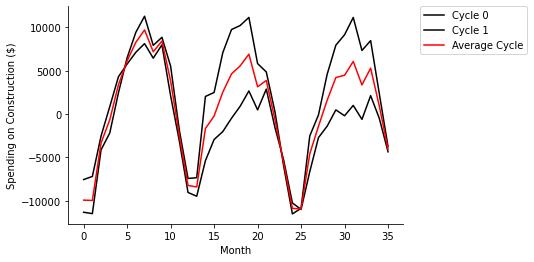

In [20]:
period = 36
cycleLen = period
numCycles = int(len(df)/cycleLen + 0.5)
cycles = [df.iloc[range(i*period,min((i+1)*period,len(df)))]['R1Private'] for i in range(numCycles)]
ptsInCycles = [df.iloc[range(i,len(df['R1Private']),period)]['R1Private'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

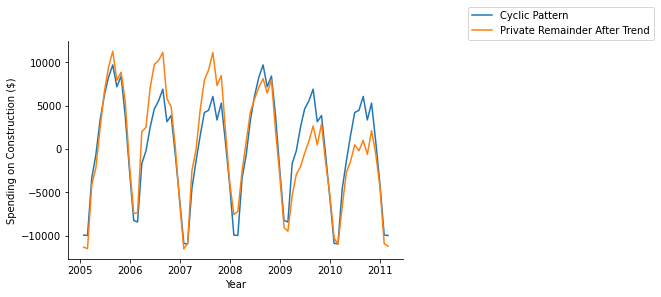

In [21]:
cycleLen = period  
numCycles = int(len(df)/cycleLen + 0.5)
df['Cr'] = np.NaN  
for i in range(len(df)):
    df.loc[df.index[i], 'Cr'] = avg[i % cycleLen]

fig,ax = plt.subplots()
ax.plot(df['Cr'],label='Cyclic Pattern')
ax.plot(df['R1Private'],label='Private Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Creating the R2 and R2Error Columns for Private Spending
Below, I create three new columns for SPending on Private Construction. The cyclical component (Cr), the error as a percentage of the Private Spending time series (R2Private), and the average absolute error of the original Private Spending time series (R2PrivateError).

Average Error:  0.0573090777639389
            Month Month-Year  Total Construction  Private Construction  \
2005-01-31     37     Jan-05               71474                 57094   
2005-02-28     38     Feb-05               72048                 57531   
2005-03-31     39     Mar-05               81345                 65425   
2005-04-30     40     Apr-05               85485                 67829   
2005-05-31     41     May-05               92959                 72862   
...           ...        ...                 ...                   ...   
2010-10-31    106     Oct-10               73470                 45539   
2010-11-30    107     Nov-10               68019                 42805   
2010-12-31    108     Dec-10               60202                 38928   
2011-01-31    109     Jan-11               50955                 32377   
2011-02-28    110     Feb-11               50544                 32069   

            Public Construction YearMonthDay     MovAvgPub     R1Public  \
2

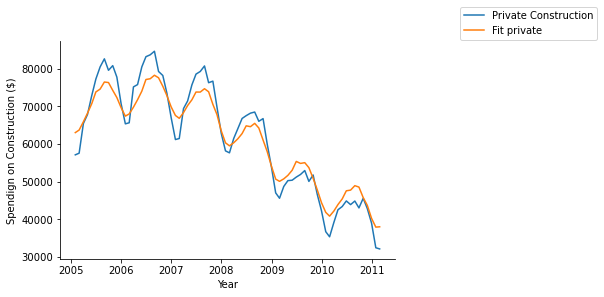

In [22]:
df['R2Private'] = df['R1Private'] - df['C']
df['R2PrivateError'] = abs(df['R2Private']/df['Private Construction'])
df['fit private'] = df['MovAvgPri'] + df['C']
df.drop(['sqErrPri'],axis=1,inplace=True)
print('Average Error: ', sum(df['R2PrivateError'])/len(df))
print(df)
fig,ax = plt.subplots()
ax.plot(df['Private Construction'],label='Private Construction')
ax.plot(df['fit private'], label = 'Fit private')
ax.set_xlabel('Year')
ax.set_ylabel('Spendign on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Correlation, lag  1     0.767476735092437
Correlation, lag  2     0.5317182834381254
Correlation, lag  3     0.31574430547585763
Correlation, lag  4     0.1868051410191744
Correlation, lag  5     0.12531153670914497
Correlation, lag  6     -0.008571847271538239
Correlation, lag  7     0.05336408680069813
Correlation, lag  8     0.05079485081527721
Correlation, lag  9     0.10524212300388477
Correlation, lag  10     0.290121735272996
Correlation, lag  11     0.5088060035577973
Correlation, lag  12     0.7063420495310823
Correlation, lag  13     0.46125376971068827
Correlation, lag  14     0.23371568801225903
Correlation, lag  15     0.032542051054011444
Correlation, lag  16     -0.08358936672116114
Correlation, lag  17     -0.10141575363583766
Correlation, lag  18     -0.2068251737519045
Correlation, lag  19     -0.10438149198572946
Correlation, lag  20     -0.10038805054377374
Correlation, lag  21     -0.0438404247637433
Correlation, lag  22     0.14480447265672716
Correlation, lag  23

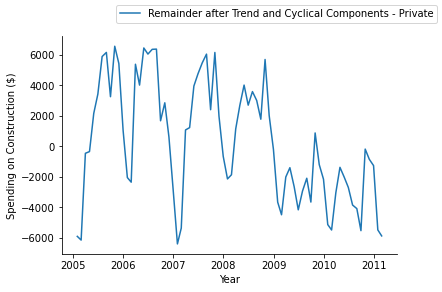

In [23]:
fig,ax = plt.subplots()
ax.plot(df['R2Private'],label='Remainder after Trend and Cyclical Components - Private')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

### Graphing the Model vs. the Original Data
Below is a graph depicting the model vs. the original data and the remainder.

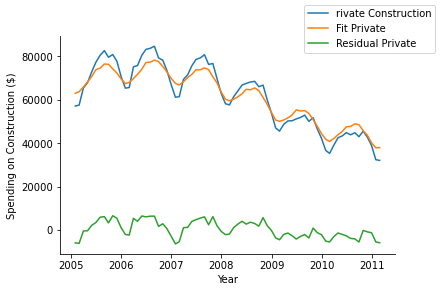

In [24]:
fig,ax = plt.subplots()
ax.plot(df['Private Construction'],label='rivate Construction')
ax.plot(df['fit private'],label='Fit Private')
ax.plot(df['R2Private'],label='Residual Private')
ax.set_xlabel('Year')
ax.set_ylabel('Spending on Construction ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()